# Laboratorium 2 - Podstawowe operacje morfologiczne


Celem laboratorium jest zaznajomienie się oraz implementacja podstawowych operacji morfologicznych - dylatacji, erozji, zamknięcia, otwarcia, oraz podstawowych operacji na maskach binarnych.

Rozpocznijmy od wczytania bibliotek:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
%matplotlib inline

Napisz dwie funkcje, pierwszą, która będzie generować obraz binarny koła i drugą, która będzie generować obraz binarny prostokąta dla zadanych parametrów:

In [3]:
def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):
		x_grid, y_grid = np.meshgrid(np.arange(x_size), np.arange(y_size))
		image = ( (x_grid - x_origin)**2 + (y_grid - y_origin)**2 < radius**2 )
 
		return image

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
		image = np.zeros((y_size, x_size))
		image[y_b:y_b+height, x_b:x_b+width] = 1

		return image

Przykład użycia:

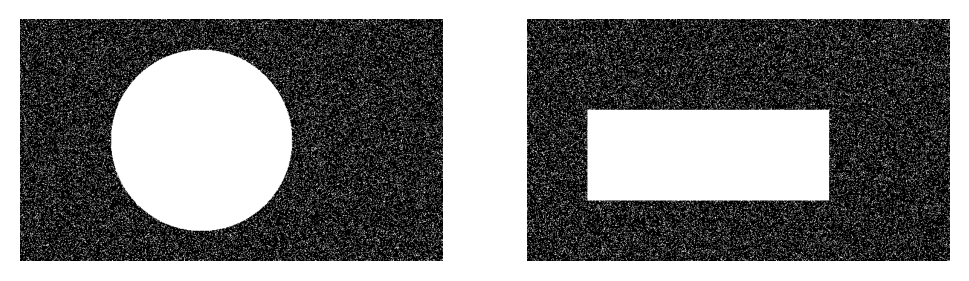

In [4]:
x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_ciricle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

# Dodanie szumu do wizualizacji następnych funkcji
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

W kolejnym kroku zaimplementuj cztery podstawowe operacje morfologiczne z zadanym elementem strukturalnym: erozję, dylatację, otwarcie oraz zamknięcie. Uwaga: nie wykorzystuj funkcji bibliotecznych implementujących powyższe funkcje, zaimplementuj je samodzielnie.

In [23]:
circle[0:3, 0:3]

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [54]:
def erosion(image, se):
		se_size = se.shape[0]
		y_size = image.shape[0]
		x_size = image.shape[1]

		eroded = np.zeros((y_size + (se_size//2), x_size+ (se_size//2)))
	
		for i in range(1, y_size-1):
				for j in range(1, x_size-1):

					f = image[i:se_size+i, j:se_size+j]
					is_all = np.array_equal(f, se)
					if is_all:
						eroded[i+1, j+1] = 1
					else:
						eroded[i+1, j+1] = 0

		return eroded[(se_size//2):, (se_size//2):]


def dilation(image, se):

		se_size = se.shape[0]
		y_size = image.shape[0]
		x_size = image.shape[1]

		dilated = np.zeros((y_size + (se_size//2), x_size+ (se_size//2)))
	
		for i in range(1, y_size-1):
			for j in range(1, x_size-1):

				f = image[i:se_size+i, j:se_size+j]
				is_any = (f==1).any()
				if is_any:
					dilated[i+1, j+1] = 1
				else:
					dilated[i+1, j+1] = 0

		return dilated[(se_size//2):, (se_size//2):]

def opening(image, se):
		return dilation(erosion(image, se), se)

def closing(image, se):
		return erosion(dilation(image, se), se)

Przykładowy wynik poszczególnych operacji. Wyjaśnij działanie każdej z nich.

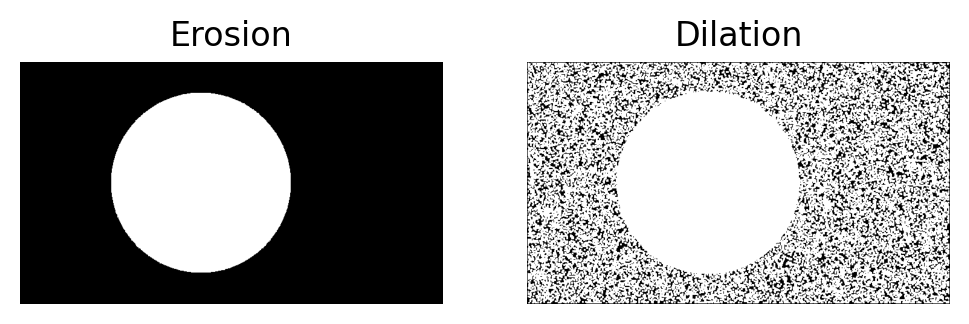

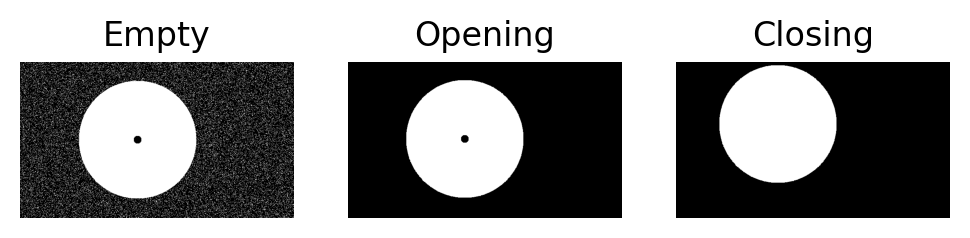

In [55]:
eroded_circle = erosion(circle, np.ones((3, 3)))
dilated_circle = dilation(circle, np.ones((3, 3)))

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle))
opened_circle = opening(empty_circle, np.ones((3, 3)))
closed_opened_circle = closing(opened_circle, np.ones((21, 21)))
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

W ostatnim kroku, zastosuj odpowiednie operacje morfologiczne, aby wyznaczyć tzw. "zewnętrzną" oraz "wewnętrzną" krawędź maski binarnej. Dla łatwości wizualizacji wygenerujmy mniejszy okrąg.

In [11]:
small_circle = generate_ciricle(64, 64, 32, 32, 8)

In [56]:
outer_edge = np.logical_xor(dilation(small_circle, np.ones((3,3))), small_circle) 
inner_edge = np.logical_xor(small_circle, erosion(small_circle, np.ones((3,3))))

Pożądany rezultat:

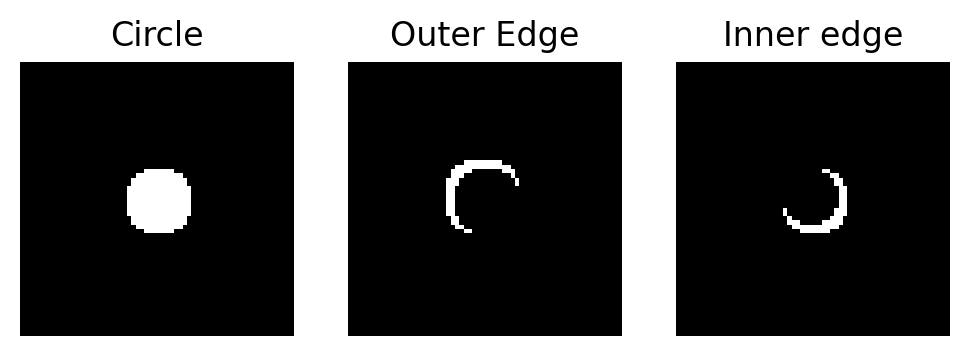

In [57]:
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(small_circle, cmap='gray')
plt.axis('off')
plt.title("Circle")
plt.subplot(1, 3, 2)
plt.imshow(outer_edge, cmap='gray')
plt.axis('off')
plt.title("Outer Edge")
plt.subplot(1, 3, 3)
plt.imshow(inner_edge, cmap='gray')
plt.axis('off')
plt.title("Inner edge")
plt.show()